In [133]:
files = ['Bilbao', 'Madrid', 'National_flipout', 'National_no_NonRenew', 'National_whole' ]

In [134]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('darkgrid')

### data

In [135]:
predicts = { f:pickle.load(open(f'./pickle/{f}_predict.pkl', 'rb')) for f in files}

In [136]:
p = predicts['National_flipout']

In [137]:
p.shape # (x1000) eol, solar, hydro, oth (x10 rep)

(1000, 4, 10)

In [138]:
to_df = []
for i,a in enumerate(p[:7*24,:,:]): # only first week
    for j,b in enumerate(a):
        for k, c in enumerate(b):
            to_df.append([i,j,k,c])

In [140]:
dfp = pd.DataFrame(to_df, columns=['forecast','type', 'iter', 'value'])
dfp.type = dfp.type.map({i:v for i,v in enumerate(['solar', 'hydro', 'wind', 'other',])})
dfp

,forecast,type,iter,value
0,0,solar,0,-0.387929
1,0,solar,1,0.058906
2,0,solar,2,-0.068672
3,0,solar,3,-0.085978
4,0,solar,4,0.175328
...,...,...,...,...
6715,167,other,5,0.743490
6716,167,other,6,0.633414
6717,167,other,7,0.753577
6718,167,other,8,0.711346


### plots

In [141]:
sns.set(rc={'figure.figsize':(15,6)})

In [142]:
# sns.lineplot(x="forecast", y="value", hue="type", data=dfp[dfp.type == 'solar'])
# sns.lineplot(x="forecast", y="value", hue="type", data=dfp[dfp.type == 'hydro'])
# sns.lineplot(x="forecast", y="value", hue="type", data=dfp[dfp.type == 'wind'])

In [143]:
sns.lineplot(x="forecast", y="value", hue="type", data=dfp[(dfp.type == 'Bilbao') | (dfp.type == 'solar')], )

In [144]:
# sns.lineplot(x="forecast", y="value", hue="type", data=dfp[(dfp.type == 'hydro') | (dfp.type == 'wind')], )

### mse

In [145]:
y_true = pickle.load(open(f'./pickle/National_flipout_true.pkl', 'rb'))

In [146]:
y_pred = np.median(p, axis=-1)

In [147]:
mse = (np.square(y_true - y_pred)).mean()

In [148]:
mse**(1/2)

0.21465735544142503

### violin

In [151]:
b, m = np.median(predicts['Bilbao'], axis=-1), np.median(predicts['Madrid'], axis=-1)

In [155]:
b[0]

array([0.13766422, 0.40599498, 0.39292641, 0.74740883])

In [160]:
dfb = pd.DataFrame([[t,e,v] for t,q in enumerate(b) for e,v in enumerate(q) ], columns=['forecast', 'type', 'value'])
dfb.type = dfb.type.map({i:v for i,v in enumerate(['solar', 'hydro', 'wind', 'other',])})
dfb['city'] = 'Bilbao'

In [161]:
dfm = pd.DataFrame([[t,e,v] for t,q in enumerate(b) for e,v in enumerate(q) ], columns=['forecast', 'type', 'value'])
dfm.type = dfm.type.map({i:v for i,v in enumerate(['solar', 'hydro', 'wind', 'other',])})
dfm['city'] = 'Madrid'

In [162]:
stk = pd.concat([dfb,dfm],ignore_index=True)

<AxesSubplot:xlabel='type', ylabel='value'>

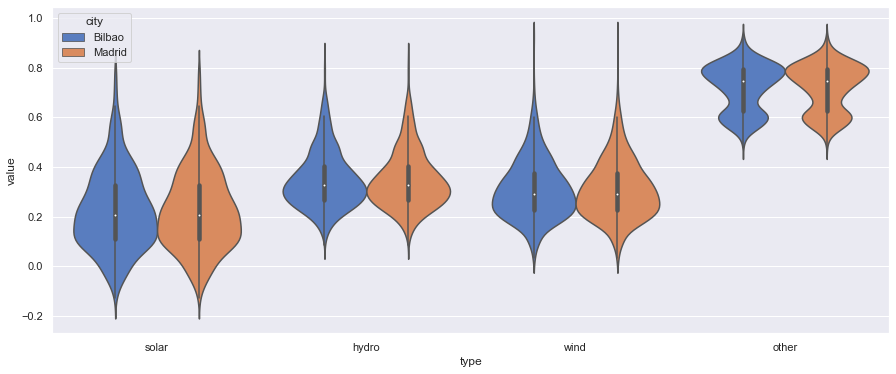

In [163]:
sns.violinplot(x="type", y="value", hue="city", data=stk, palette="muted")